Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [45]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('../data/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [46]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('../data/daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open('../data/project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

In [47]:
type(enrollments)

list

In [48]:
# First element
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [49]:
# last element
enrollments[-1]

{u'account_key': u'686',
 u'cancel_date': u'',
 u'days_to_cancel': u'',
 u'is_canceled': u'False',
 u'is_udacity': u'False',
 u'join_date': u'2015-08-23',
 u'status': u'current'}

In [50]:
# slice: first 2 elements
enrollments[0:2]

[{u'account_key': u'448',
  u'cancel_date': u'2015-01-14',
  u'days_to_cancel': u'65',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'account_key': u'448',
  u'cancel_date': u'2014-11-10',
  u'days_to_cancel': u'5',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-05',
  u'status': u'canceled'}]

In [51]:
# account_key of the last element
enrollments[-1]['account_key']

u'686'

In [52]:
# size of the list
len(enrollments)

1640

In [53]:
# filter element 448
filter(lambda person: person['account_key'] == '448', enrollments)

[{u'account_key': u'448',
  u'cancel_date': u'2015-01-14',
  u'days_to_cancel': u'65',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'account_key': u'448',
  u'cancel_date': u'2014-11-10',
  u'days_to_cancel': u'5',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-05',
  u'status': u'canceled'},
 {u'account_key': u'448',
  u'cancel_date': u'2015-01-27',
  u'days_to_cancel': u'0',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2015-01-27',
  u'status': u'canceled'},
 {u'account_key': u'448',
  u'cancel_date': u'2014-11-10',
  u'days_to_cancel': u'0',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'account_key': u'448',
  u'cancel_date': u'',
  u'days_to_cancel': u'',
  u'is_canceled': u'False',
  u'is_udacity': u'True',
  u'join_date': u'2015-03-10',
  u'status': u'current'},
 {u'account_key': u'448',

In [54]:
count = 0
account_key = []
for i in enrollments:
    count +=1
    account_key.append(i['account_key'])
    #print i['account_key']
    
print "count="+repr(count)
print "size="+repr(len(account_key))
print "unique="+repr(len(set(account_key)))

count=1640
size=1640
unique=1302


## Fixing Data Types

In [55]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [56]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [57]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [58]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = 0
enrollment_num_unique_students = 0
account_key = []
for i in enrollments:
    enrollment_num_rows +=1
    account_key.append(i['account_key'])

enrollment_num_rows = len(account_key)
enrollment_num_unique_students = len(set(account_key))  

engagement_num_rows = 0             
engagement_num_unique_students = 0  
acct = []
for i in daily_engagement:
    engagement_num_rows +=1
    acct.append(i['acct'])


engagement_num_rows = len(acct)             
engagement_num_unique_students = len(set(acct))  

submission_num_rows = 0             
submission_num_unique_students = 0
account = []
for i in project_submissions:
    submission_num_rows +=1
    account.append(i['account_key'])

submission_num_rows = len(account)             
submission_num_unique_students = len(set(account))

In [59]:
print enrollment_num_rows
print enrollment_num_unique_students

print engagement_num_rows
print engagement_num_unique_students

print submission_num_rows
print submission_num_unique_students

1640
1302
136240
1237
3642
743


## Problems in the Data

In [60]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for d in daily_engagement:
    d['account_key'] = d.pop('acct')
    
    
# slice: first element
daily_engagement[0]['account_key']

u'0'

In [61]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
print len(unique_enrolled_students)
unique_engagement_students = get_unique_students(daily_engagement)
print len(daily_engagement)
print len(unique_engagement_students)
print len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
print len(unique_project_submitters)

1640
1302
136240
1237
3642
743


## Missing Engagement Records

In [62]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [63]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    nb = enrollment['days_to_cancel']
    if student not in unique_engagement_students and nb > 0:
        print enrollment
        count +=1
        
print count

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
2


## Tracking Down the Remaining Problems

In [64]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [65]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [66]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [67]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for enrollment in non_udacity_enrollments:
    acct = enrollment['account_key']
    #print "account:"+repr(acct)
    n = 0
    if enrollment['days_to_cancel'] != None:
        #n = (enrollment['cancel_date'] - enrollment['join_date']).days
        n = enrollment['days_to_cancel']
    #print "status:"+repr(enrollment['status'])
    #print "n="+repr(n)
    if enrollment['days_to_cancel']==None or (n > 7):
        paid_students[acct] = enrollment['join_date']

print len(paid_students)

995


## Getting Data from First Week

In [68]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [69]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial(non_udacity_enrollments)
paid_engagements = remove_free_trial(non_udacity_engagement)
paid_submissions = remove_free_trial(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagements)
print len(paid_submissions)

1293
134549
3618


In [70]:
paid_engagement_in_first_week = []

for eng_rec in paid_engagements:
    account_key = eng_rec['account_key']
    join_date = paid_students[account_key]
    eng_rec_date = eng_rec['utc_date']
    
    if within_one_week(join_date,eng_rec_date):
        paid_engagement_in_first_week.append(eng_rec)
        
len(paid_engagement_in_first_week)

6920

## Exploring Student Engagement

In [71]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [72]:
engagement_by_account['0']

[{'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 53.6337463333,
  u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 33.4892696667,
  u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 64.7796776667,
  u'utc_date': datetime.datetime(2015,

In [73]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [74]:
total_minutes_by_account['0']

494.88049616599994

In [75]:
## first 5 values
total_minutes_by_account.values()[0:5]

[1482.9020456663002, 129.85920366667, 0.0, 726.26075933267, 614.9778563333]

In [76]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


In [77]:
for account_key, total_min in total_minutes_by_account.iteritems():
    if total_min >= 10000:
        print account_key
        print engagement_by_account[account_key]

## Debugging Data Analysis Code

In [78]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_mn = None
max_min = 0

for student, total_min in total_minutes_by_account.items():
    if total_min > max_min:
        max_min = total_min
        student_with_max_mn = student
        
print max_min

3564.7332645


In [79]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mn:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

Summarize the data about minutes spent in the classroom
Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645
lessons completed
Mean: 1.63216080402
Standard deviation: 3.00140182563
Minimum: 0
Maximum: 36


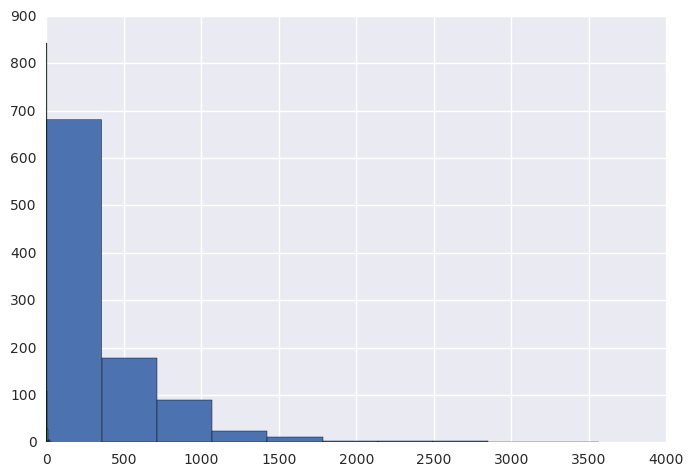

In [80]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
from collections import defaultdict

def group_data(data,key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

#print "engagement by account" + repr(engagement_by_account)
#print "\n end ---------------------------"
def sum_grouped_items(grouped_data,field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_min_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')
#print total_minutes_by_account

#%pylab inline  

import numpy as np
import matplotlib.pyplot as plt

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data) 
    plt.hist(data)
    
# Summarize the data about minutes spent in the classroom
print "Summarize the data about minutes spent in the classroom"
total_mns = total_min_by_account.values()
describe_data(total_mns)

# lessons_completed
print "lessons completed"
total_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
#print "total completed by account: "+repr(total_completed_by_account)
total_completed = total_completed_by_account.values()
describe_data(total_completed)

## Number of Visits in First Week

Mean: 4.02914572864
Standard deviation: 3.54584543843
Minimum: 0
Maximum: 25
Mean: 2.91256281407
Standard deviation: 2.22037005491
Minimum: 0
Maximum: 7


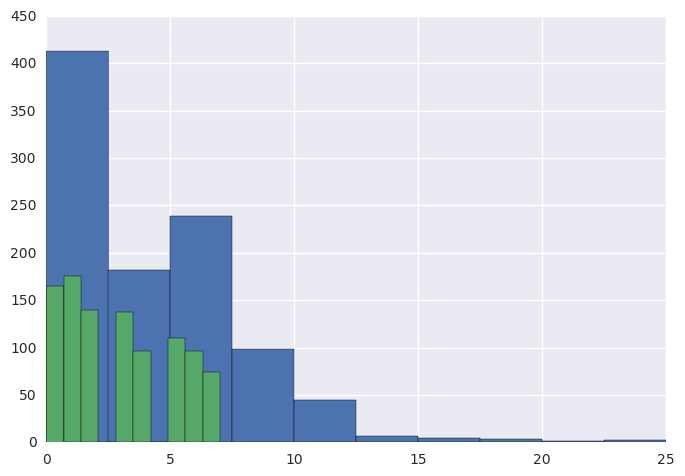

In [81]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for eng_rec in paid_engagements:
    if eng_rec['num_courses_visited'] > 0:
        eng_rec['has_visited'] = 1
    else:
        eng_rec['has_visited'] = 0
        

total_courses_by_account = sum_grouped_items(engagement_by_account,'num_courses_visited')
#print total_courses_by_account
#print engagement_by_account
describe_data(total_courses_by_account.values())

total_hasvisited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
#print total_courses_by_account
#print engagement_by_account
describe_data(total_hasvisited_by_account.values())

## Splitting out Passing Students

In [82]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
non_passing_engagement = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
    
print "subway project size:"+repr(len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

for enr in paid_engagement_in_first_week:
    if enr['account_key'] in pass_subway_project:
        passing_engagement.append(enr)
    else:
        non_passing_engagement.append(enr)

print len(passing_engagement)
print len(non_passing_engagement)
passing_engagement[0:2]

subway project size:647
4528
2392


[{'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}]

## Comparing the Two Student Groups

----- PASSED -----
total_minutes_visited
Mean: 391.481722325
Standard deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645
lessons_completed
Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36
num_courses_visited
Mean: 4.77743431221
Standard deviation: 3.64540118937
Minimum: 0
Maximum: 25
days visited
Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7
----- FAILED -----
total_minutes_visited
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933
lessons_completed
Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27
num_courses_visited
Mean: 2.63793103448
Standard deviation: 2.87497091957
Minimum: 0
Maximum: 18
days visited
Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7


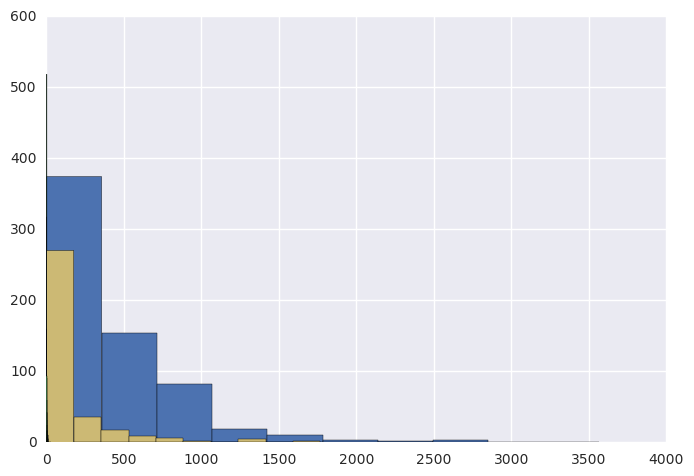

In [83]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
# 'lessons_completed','num_courses_visited','total_minutes_visited','projects_completed','account_key'
print "----- PASSED -----"
print "total_minutes_visited"
eng_by_account = group_data(passing_engagement,'account_key')
total_by_account = sum_grouped_items(eng_by_account,'total_minutes_visited')
describe_data(total_by_account.values())
print "lessons_completed"
total_by_account = sum_grouped_items(eng_by_account,'lessons_completed')
describe_data(total_by_account.values())
total_by_account = sum_grouped_items(eng_by_account,'num_courses_visited')
print "num_courses_visited"
describe_data(total_by_account.values())
total_by_account = sum_grouped_items(eng_by_account,'has_visited')
print "days visited"
describe_data(total_by_account.values())
print "----- FAILED -----"
eng_by_account = group_data(non_passing_engagement,'account_key')
print "total_minutes_visited"
total_by_account = sum_grouped_items(eng_by_account,'total_minutes_visited')
describe_data(total_by_account.values())
print "lessons_completed"
total_by_account = sum_grouped_items(eng_by_account,'lessons_completed')
describe_data(total_by_account.values())
total_by_account = sum_grouped_items(eng_by_account,'num_courses_visited')
print "num_courses_visited"
describe_data(total_by_account.values())
total_by_account = sum_grouped_items(eng_by_account,'has_visited')
print "days visited"
describe_data(total_by_account.values())

## Making Histograms

----- PASSED -----
total_minutes_visited


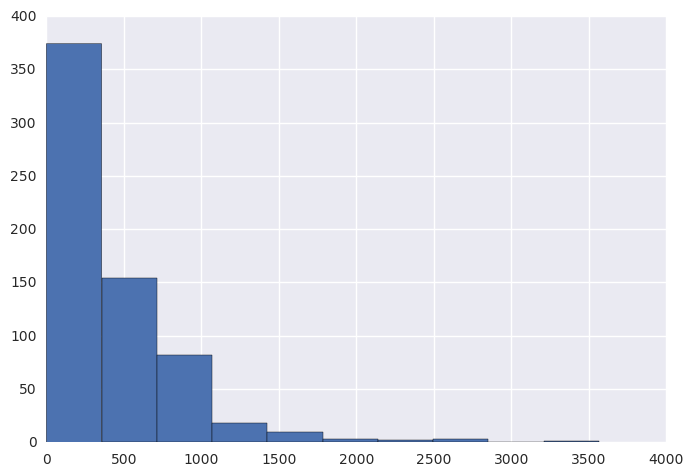

----- FAILED -----
total_minutes_visited
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933


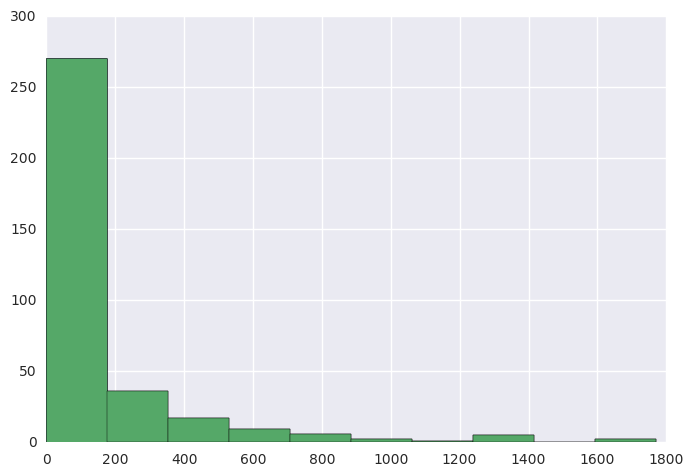

In [84]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
print "----- PASSED -----"
print "total_minutes_visited"
eng_by_account = group_data(passing_engagement,'account_key')
total_by_account = sum_grouped_items(eng_by_account,'total_minutes_visited')
#describe_data(total_by_account.values())

import matplotlib.pyplot as plt
plt.hist(total_by_account.values())
plt.show()

print "----- FAILED -----"
non_eng_by_account = group_data(non_passing_engagement,'account_key')
print "total_minutes_visited"
total_by_account = sum_grouped_items(non_eng_by_account,'total_minutes_visited')
describe_data(total_by_account.values())

import matplotlib.pyplot as plt
plt.hist(total_by_account.values())
plt.show()

----- PASSED -----
lessons_completed


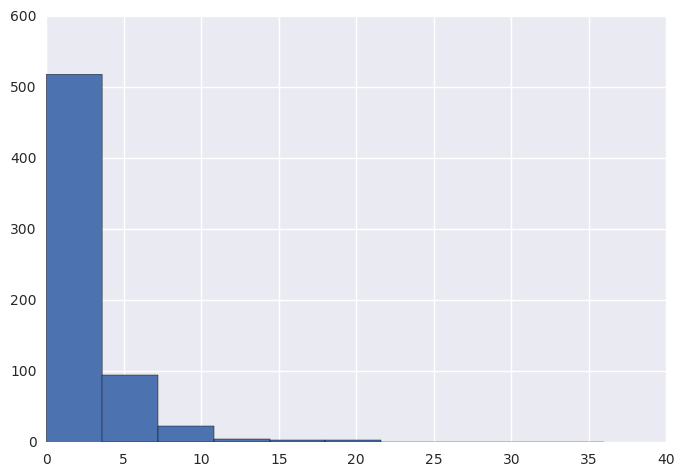

----- FAILED -----
lessons_completed


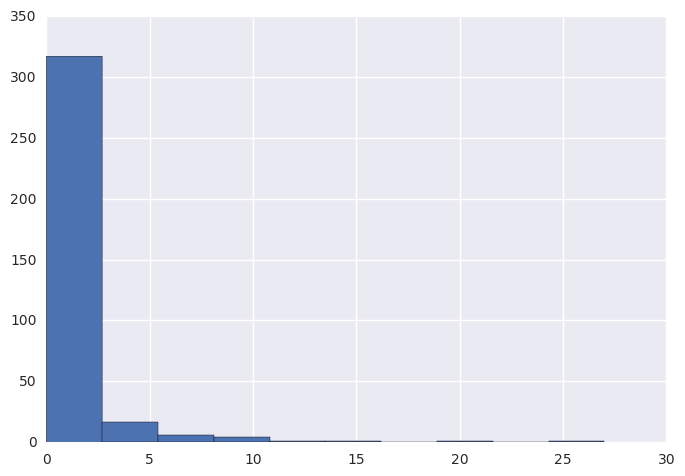

In [85]:
print "----- PASSED -----"
print "lessons_completed"
total_by_account = sum_grouped_items(eng_by_account,'lessons_completed')

plt.hist(total_by_account.values())
plt.show()

print "----- FAILED -----"
print "lessons_completed"
total_by_account = sum_grouped_items(non_eng_by_account,'lessons_completed')

plt.hist(total_by_account.values())
plt.show()

----- PASSED -----
num_courses_visited


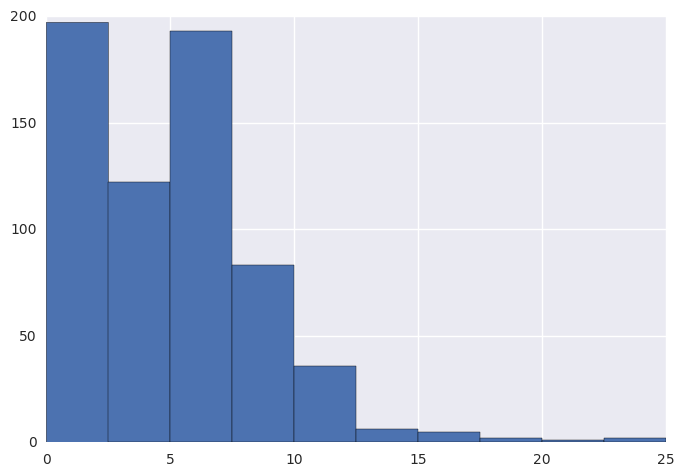

----- FAILED -----
num_courses_visited


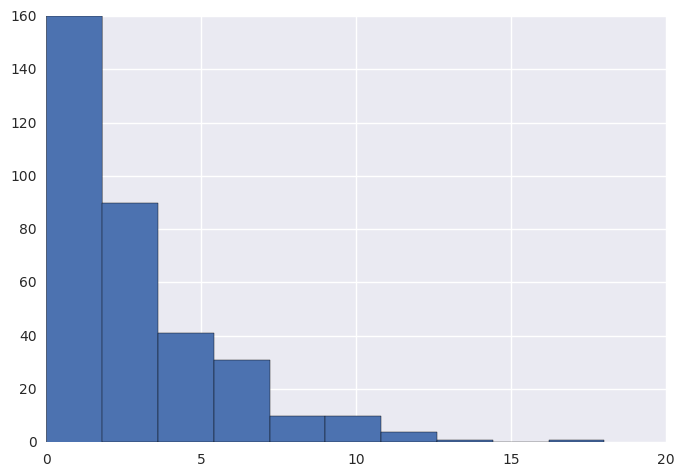

In [86]:
print "----- PASSED -----"
print "num_courses_visited"
total_by_account = sum_grouped_items(eng_by_account,'num_courses_visited')

plt.hist(total_by_account.values())
plt.show()

print "----- FAILED -----"
print "num_courses_visited"
total_by_account = sum_grouped_items(non_eng_by_account,'num_courses_visited')

plt.hist(total_by_account.values())
plt.show()

----- PASSED -----
has_visited


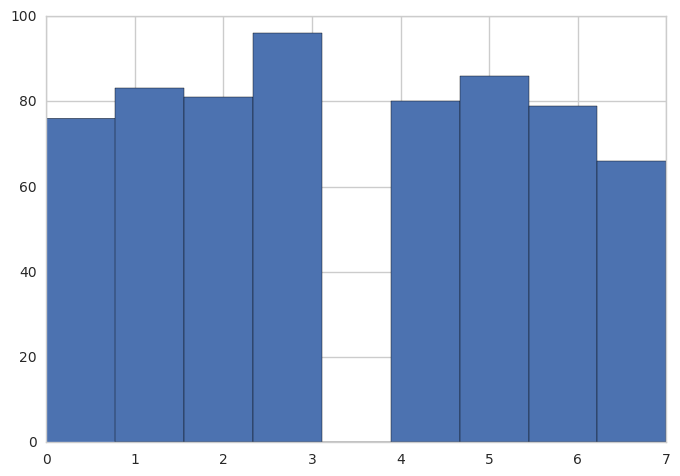

----- FAILED -----
has_visited


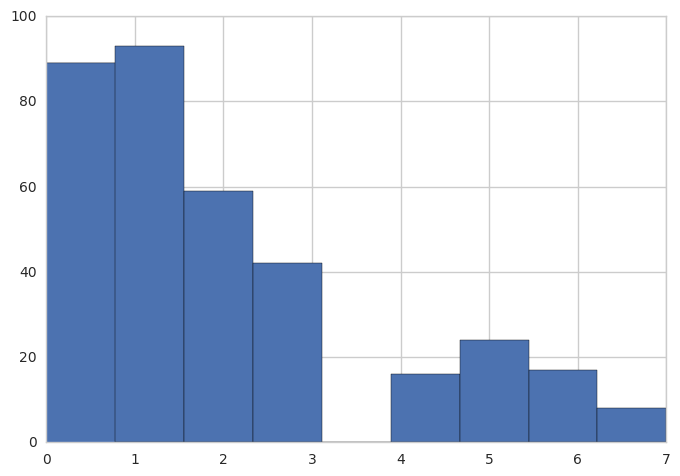

In [104]:
print "----- PASSED -----"
print "has_visited"
total_by_account = sum_grouped_items(eng_by_account,'has_visited')

plt.hist(total_by_account.values(),bins=9)
plt.show()

print "----- FAILED -----"
print "has_visited"
total_by_account = sum_grouped_items(non_eng_by_account,'has_visited')

plt.hist(total_by_account.values(),bins=9)
plt.show()

## Improving Plots and Sharing Findings

In [97]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.despine()

----- PASSED -----
has_visited


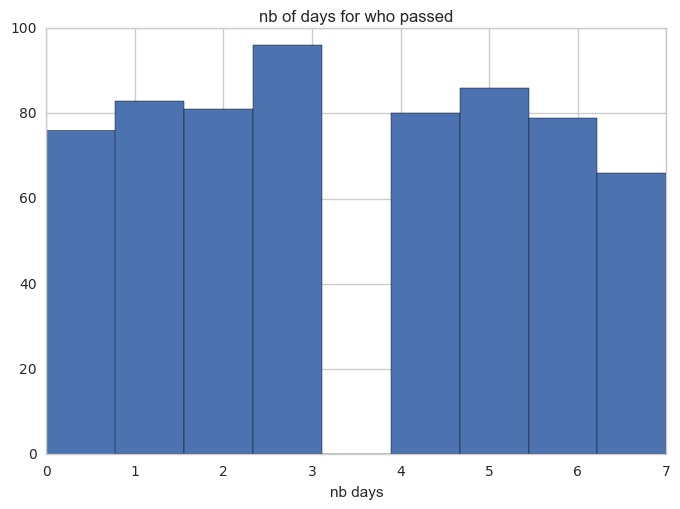

----- FAILED -----
has_visited


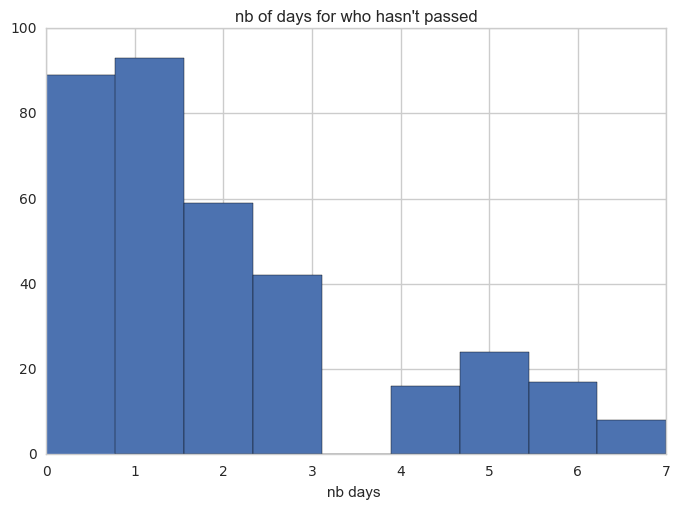

In [109]:
print "----- PASSED -----"
print "has_visited"
total_by_account = sum_grouped_items(eng_by_account,'has_visited')

plt.hist(total_by_account.values(),bins=9)
plt.xlabel("nb days")
plt.title("nb of days for who passed")
plt.show()

print "----- FAILED -----"
print "has_visited"
total_by_account = sum_grouped_items(non_eng_by_account,'has_visited')

plt.hist(total_by_account.values(),bins=9)
plt.xlabel("nb days ")
plt.title("nb of days for who hasn't passed")
plt.show()